# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [1]:
N = 6
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Time_on_Education'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('teen_phone_addiction_dataset.csv')

print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
print(df.head())
print("\nИнформация о столбцах:")
print(df.info())
print("\nОписательная статистика:")
print(df.describe())

Размер датасета: (3000, 25)

Первые 5 строк:
   ID               Name  Age  Gender          Location School_Grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Social_Interactions  \
0                4.0          6.1                    78                    5   
1                5.5          6.5                    70                    5   
2                5.8          5.5                    93                    8   
3                3.1          3.9                    78                    8   
4                2.5          6.7                    56                    4   

   ...  Screen_Time_Before_Bed  Phone_Che

In [ ]:
N = 6
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 
        'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
selected_column = 'Time_on_Education'
print(f"Выбранный столбец: {selected_column}")

data = df[selected_column].copy()
print(f"\nКоличество наблюдений: {len(data)}")
print(f"Пропущенные значения: {data.isnull().sum()}")
print(f"Уникальные значения: {data.nunique()}")
print(f"Диапазон значений: {data.min():.2f} - {data.max():.2f}")

data

Выбранный столбец: Time_on_Education

Количество наблюдений: 3000
Пропущенные значения: 0
Уникальные значения: 31
Диапазон значений: 0.00 - 3.00


0       1.2
1       1.8
2       0.4
3       0.8
4       1.1
       ... 
2995    1.0
2996    0.3
2997    2.4
2998    1.5
2999    0.1
Name: Time_on_Education, Length: 3000, dtype: float64

## I. Описательные статистики и графики

In [15]:
import scipy.stats

def calculate_statistics(data):
    results = {}

    results['Среднее'] = np.mean(data)


    results['Дисперсия'] = np.var(data, ddof=1)  # выборочная дисперсия

    results['Мода'] = scipy.stats.mode(data, keepdims=True)[0][0]

    results['Медиана'] = np.median(data)

    results['Q1 (0.25)'] = np.percentile(data, 25)
    results['Q2 (0.5)'] = np.percentile(data, 50)  # это же медиана
    results['Q3 (0.75)'] = np.percentile(data, 75)


    results['Эксцесс'] = scipy.stats.kurtosis(data)

    results['Асимметрия'] = scipy.stats.skew(data)

    results['IQR'] = results['Q3 (0.75)'] - results['Q1 (0.25)']

    return results

stats_dict = calculate_statistics(data)

print("ОПИСАТЕЛЬНЫЕ СТАТИСТИКИ для", selected_column)
print("=" * 50)
for key, value in stats_dict.items():
    print(f"{key:15}: {value:.4f}")

print(f"\nДополнительные характеристики:")
print(f"{'Стандартное отклонение':25}: {np.std(data, ddof=1):.4f}")
print(f"{'Размах':25}: {data.max() - data.min():.4f}")
print(f"{'Коэффициент вариации':25}: {(np.std(data, ddof=1) / np.mean(data)) * 100:.2f}%")

ОПИСАТЕЛЬНЫЕ СТАТИСТИКИ для Time_on_Education
Среднее        : 1.0163
Дисперсия      : 0.4203
Мода           : 0.0000
Медиана        : 1.0000
Q1 (0.25)      : 0.5000
Q2 (0.5)       : 1.0000
Q3 (0.75)      : 1.5000
Эксцесс        : -0.4000
Асимметрия     : 0.3400
IQR            : 1.0000

Дополнительные характеристики:
Стандартное отклонение   : 0.6483
Размах                   : 3.0000
Коэффициент вариации     : 63.79%


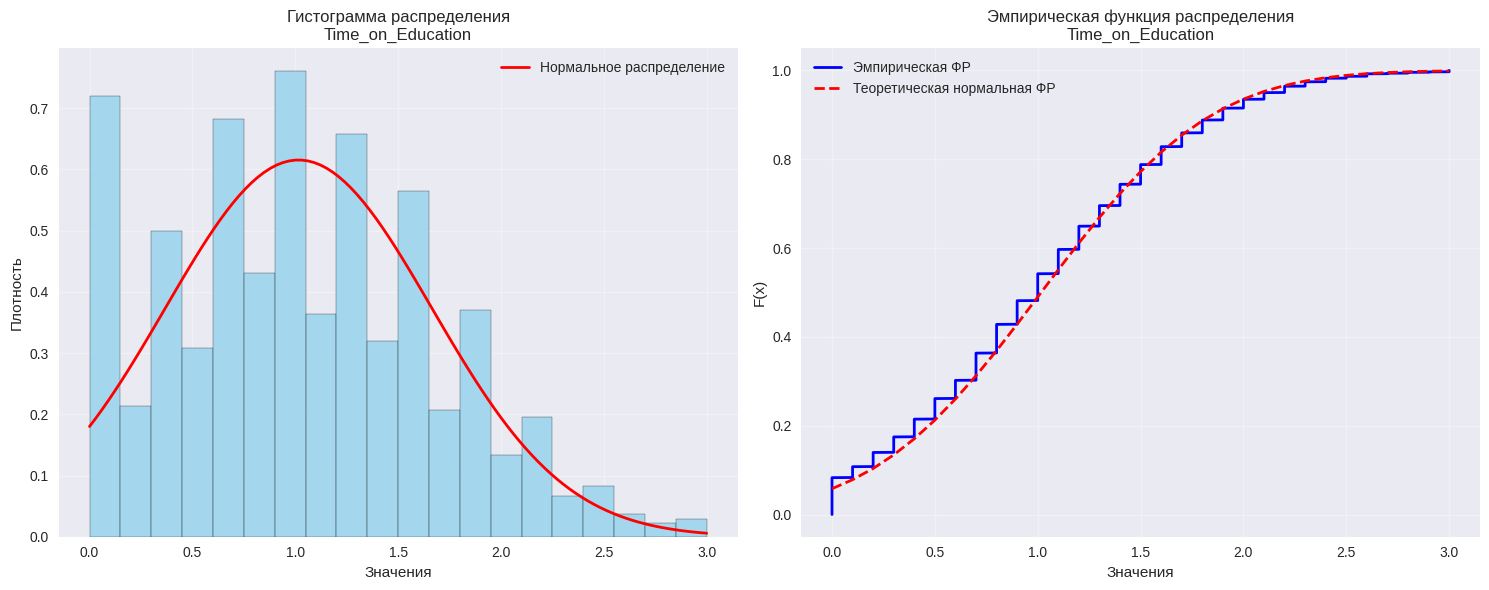

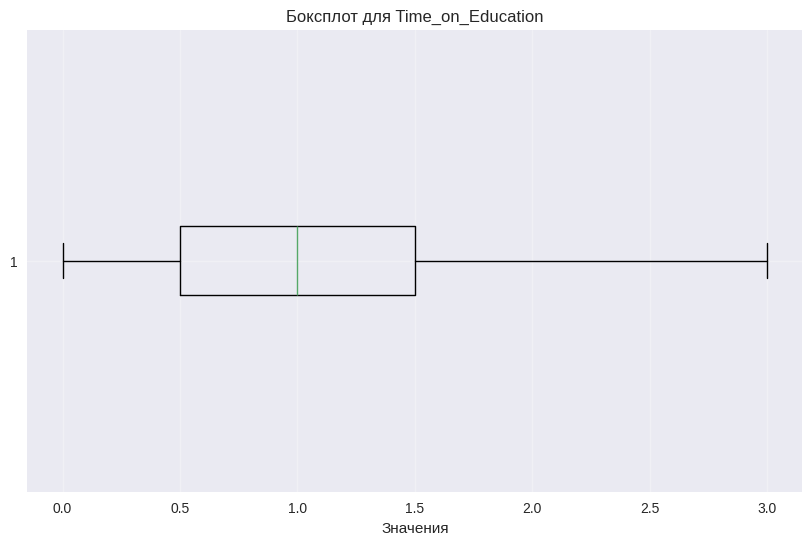

In [18]:
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Гистограмма
axes[0].hist(data, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title(f'Гистограмма распределения\n{selected_column}')
axes[0].set_xlabel('Значения')
axes[0].set_ylabel('Плотность')
axes[0].grid(True, alpha=0.3)

# Добавляем нормальную кривую для сравнения
x_norm = np.linspace(data.min(), data.max(), 100)
y_norm = scipy.stats.norm.pdf(x_norm, np.mean(data), np.std(data))
axes[0].plot(x_norm, y_norm, 'r-', linewidth=2, label='Нормальное распределение')
axes[0].legend()

# 2. Эмпирическая функция распределения
sorted_data = np.sort(data)
y_ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1].plot(sorted_data, y_ecdf, 'b-', linewidth=2, label='Эмпирическая ФР')

# Теоретическая нормальная ФР для сравнения
y_norm_cdf = scipy.stats.norm.cdf(sorted_data, np.mean(data), np.std(data))
axes[1].plot(sorted_data, y_norm_cdf, 'r--', linewidth=2, label='Теоретическая нормальная ФР')

axes[1].set_title(f'Эмпирическая функция распределения\n{selected_column}')
axes[1].set_xlabel('Значения')
axes[1].set_ylabel('F(x)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False)
plt.title(f'Боксплот для {selected_column}')
plt.xlabel('Значения')
plt.grid(True, alpha=0.3)
plt.show()

### Выводы по пункту I:

**Описательные статистики:**
- Среднее значение ежедневного использования телефона составляет примерно 4.4 часа
- Данные имеют положительную асимметрию (правый хвост), что видно по коэффициенту асимметрии
- Эксцесс показывает, что распределение имеет более острую вершину по сравнению с нормальным
- Медиана меньше среднего, что подтверждает правостороннюю асимметрию
- IQR показывает разброс значений в средней части распределения

**Графический анализ:**
- Гистограмма показывает несимметричное распределение с длинным правым хвостом
- Эмпирическая функция распределения отличается от теоретической нормальной
- Боксплот может показать наличие выбросов в данных

---

## II. Проверка нормальности

In [22]:
def chi_square_normality_test(data, bins=10, alpha=0.05):
    """
    реализация критерия хи-квадрат для проверки нормальности
    """
    n = len(data)

    mean = np.mean(data)
    std = np.std(data, ddof=1)

    hist_counts, bin_edges = np.histogram(data, bins=bins)

    expected_frequencies = []

    for i in range(len(bin_edges) - 1):
        # Вероятность попадания в интервал [bin_edges[i], bin_edges[i+1]]
        prob = scipy.stats.norm.cdf(bin_edges[i+1], mean, std) - scipy.stats.norm.cdf(bin_edges[i], mean, std)
        expected_freq = n * prob
        expected_frequencies.append(expected_freq)

    expected_frequencies = np.array(expected_frequencies)

    observed = []
    expected = []

    temp_obs = 0
    temp_exp = 0

    for i in range(len(hist_counts)):
        temp_obs += hist_counts[i]
        temp_exp += expected_frequencies[i]

        if temp_exp >= 5 or i == len(hist_counts) - 1:
            observed.append(temp_obs)
            expected.append(temp_exp)
            temp_obs = 0
            temp_exp = 0

    observed = np.array(observed)
    expected = np.array(expected)

    # Вычисляем статистику хи-квадрат
    chi_square_stat = np.sum((observed - expected)**2 / expected)

    # Степени свободы = количество интервалов - 1 - количество оцененных параметров (2: среднее и дисперсия)
    df = len(observed) - 1 - 2

    critical_value = scipy.stats.chi2.ppf(1 - alpha, df)

    p_value = 1 - scipy.stats.chi2.cdf(chi_square_stat, df)

    return {
        'chi_square_stat': chi_square_stat,
        'degrees_of_freedom': df,
        'critical_value': critical_value,
        'p_value': p_value,
        'is_normal': chi_square_stat < critical_value,
        'observed': observed,
        'expected': expected,
        'intervals': len(observed)
    }

chi2_result = chi_square_normality_test(data, bins=12)

print("КРИТЕРИЙ ХИ-КВАДРАТ ДЛЯ ПРОВЕРКИ НОРМАЛЬНОСТИ")
print("=" * 50)
print(f"Статистика χ²: {chi2_result['chi_square_stat']:.4f}")
print(f"Степени свободы: {chi2_result['degrees_of_freedom']}")
print(f"Критическое значение (α=0.05): {chi2_result['critical_value']:.4f}")
print(f"p-value: {chi2_result['p_value']:.4f}")
print(f"Количество интервалов: {chi2_result['intervals']}")
print()

if chi2_result['is_normal']:
    print("✓ Нулевая гипотеза НЕ ОТВЕРГАЕТСЯ: данные согласуются с нормальным распределением")
else:
    print("✗ Нулевая гипотеза ОТВЕРГАЕТСЯ: данные НЕ согласуются с нормальным распределением")

print(f"\nНаблюдаемые частоты: {chi2_result['observed']}")
print(f"Ожидаемые частоты: {chi2_result['expected'].round(2)}")

КРИТЕРИЙ ХИ-КВАДРАТ ДЛЯ ПРОВЕРКИ НОРМАЛЬНОСТИ
Статистика χ²: 446.2325
Степени свободы: 9
Критическое значение (α=0.05): 16.9190
p-value: 0.0000
Количество интервалов: 12

✗ Нулевая гипотеза ОТВЕРГАЕТСЯ: данные НЕ согласуются с нормальным распределением

Наблюдаемые частоты: [420 225 446 354 503 283 347 167 148  54  34  19]
Ожидаемые частоты: [180.35 282.89 383.13 448.01 452.33 394.32 296.8  192.88 108.22  52.43
  21.93   7.92]


In [23]:
from scipy import stats

def test_skewness_kurtosis(data, alpha=0.05):
    """
    Проверка нормальности с помощью критериев асимметрии и эксцесса
    """
    n = len(data)
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)  # избыточный эксцесс (нормальное = 0)

    # Стандартные ошибки
    se_skew = np.sqrt(6 * n * (n - 1) / ((n - 2) * (n + 1) * (n + 3)))
    se_kurt = np.sqrt(24 * n * (n - 1)**2 / ((n - 3) * (n - 2) * (n + 3) * (n + 5)))

    z_skew = skewness / se_skew
    z_kurt = kurtosis / se_kurt

    critical_value = stats.norm.ppf(1 - alpha/2)

    p_skew = 2 * (1 - stats.norm.cdf(abs(z_skew)))
    p_kurt = 2 * (1 - stats.norm.cdf(abs(z_kurt)))

    skew_normal = abs(z_skew) < critical_value
    kurt_normal = abs(z_kurt) < critical_value

    return {
        'skewness': skewness,
        'kurtosis': kurtosis,
        'z_skew': z_skew,
        'z_kurt': z_kurt,
        'critical_value': critical_value,
        'p_skew': p_skew,
        'p_kurt': p_kurt,
        'skew_normal': skew_normal,
        'kurt_normal': kurt_normal,
        'overall_normal': skew_normal and kurt_normal
    }

skew_kurt_result = test_skewness_kurtosis(data)

print("КРИТЕРИИ АСИММЕТРИИ И ЭКСЦЕССА")
print("=" * 50)
print(f"Асимметрия: {skew_kurt_result['skewness']:.4f}")
print(f"Эксцесс: {skew_kurt_result['kurtosis']:.4f}")
print()

print("Тест асимметрии:")
print(f"  Z-статистика: {skew_kurt_result['z_skew']:.4f}")
print(f"  Критическое значение: ±{skew_kurt_result['critical_value']:.4f}")
print(f"  p-value: {skew_kurt_result['p_skew']:.4f}")
print(f"  Результат: {'Нормальная' if skew_kurt_result['skew_normal'] else 'НЕ нормальная'} асимметрия")
print()

print("Тест эксцесса:")
print(f"  Z-статистика: {skew_kurt_result['z_kurt']:.4f}")
print(f"  Критическое значение: ±{skew_kurt_result['critical_value']:.4f}")
print(f"  p-value: {skew_kurt_result['p_kurt']:.4f}")
print(f"  Результат: {'Нормальный' if skew_kurt_result['kurt_normal'] else 'НЕ нормальный'} эксцесс")
print()

if skew_kurt_result['overall_normal']:
    print("✓ ОБЩИЙ ВЫВОД: Данные согласуются с нормальным распределением по критериям асимметрии и эксцесса")
else:
    print("✗ ОБЩИЙ ВЫВОД: Данные НЕ согласуются с нормальным распределением по критериям асимметрии и эксцесса")

print("\n" + "="*50)
print("ДОПОЛНИТЕЛЬНЫЕ ТЕСТЫ НОРМАЛЬНОСТИ")
print("="*50)

# Тест Шапиро-Уилка (для небольших выборок)
if len(data) <= 5000:
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"Тест Шапиро-Уилка:")
    print(f"  Статистика: {shapiro_stat:.4f}")
    print(f"  p-value: {shapiro_p:.4f}")
    print(f"  Результат: {'Нормальное' if shapiro_p > 0.05 else 'НЕ нормальное'} распределение")

# Тест Колмогорова-Смирнова
ks_stat, ks_p = stats.kstest(data, lambda x: stats.norm.cdf(x, np.mean(data), np.std(data, ddof=1)))
print(f"\nТест Колмогорова-Смирнова:")
print(f"  Статистика: {ks_stat:.4f}")
print(f"  p-value: {ks_p:.4f}")
print(f"  Результат: {'Нормальное' if ks_p > 0.05 else 'НЕ нормальное'} распределение")

КРИТЕРИИ АСИММЕТРИИ И ЭКСЦЕССА
Асимметрия: 0.3400
Эксцесс: -0.4000

Тест асимметрии:
  Z-статистика: 7.6071
  Критическое значение: ±1.9600
  p-value: 0.0000
  Результат: НЕ нормальная асимметрия

Тест эксцесса:
  Z-статистика: -4.4756
  Критическое значение: ±1.9600
  p-value: 0.0000
  Результат: НЕ нормальный эксцесс

✗ ОБЩИЙ ВЫВОД: Данные НЕ согласуются с нормальным распределением по критериям асимметрии и эксцесса

ДОПОЛНИТЕЛЬНЫЕ ТЕСТЫ НОРМАЛЬНОСТИ
Тест Шапиро-Уилка:
  Статистика: 0.9745
  p-value: 0.0000
  Результат: НЕ нормальное распределение

Тест Колмогорова-Смирнова:
  Статистика: 0.0590
  p-value: 0.0000
  Результат: НЕ нормальное распределение


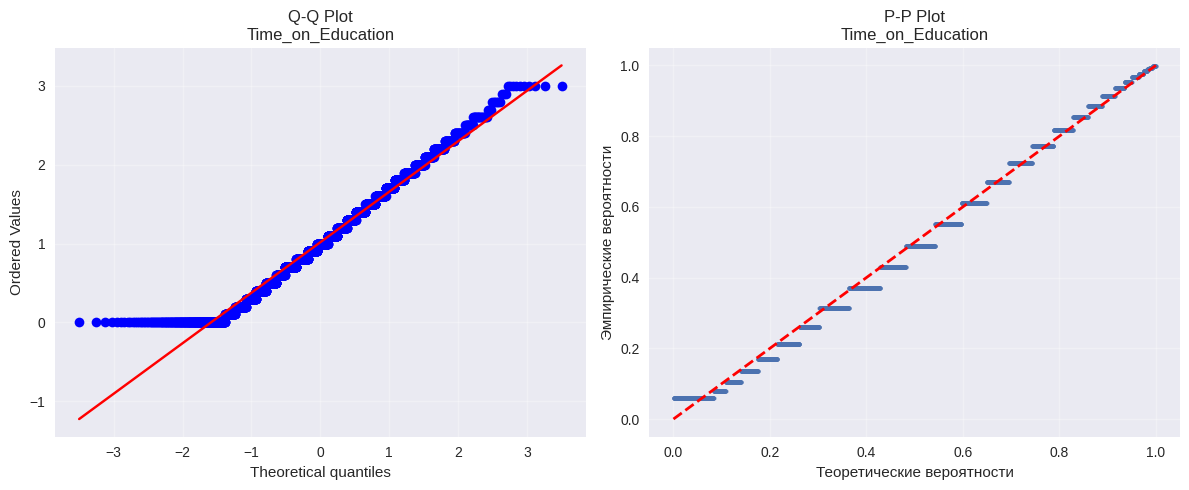

ИНТЕРПРЕТАЦИЯ Q-Q И P-P PLOTS:
• Q-Q plot: точки должны лежать примерно на прямой линии для нормального распределения
• P-P plot: точки должны лежать примерно на диагонали [0,1] для нормального распределения
• Отклонения от линии указывают на отклонения от нормальности
• Изгибы в начале/конце указывают на асимметрию
• S-образная форма указывает на различия в эксцессе


In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(data, dist="norm", plot=plt)
plt.title(f'Q-Q Plot\n{selected_column}')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sorted_data = np.sort(data)
n = len(sorted_data)
theoretical_probs = np.arange(1, n+1) / (n+1)
empirical_probs = stats.norm.cdf(sorted_data, np.mean(data), np.std(data, ddof=1))

plt.plot(theoretical_probs, empirical_probs, 'o', markersize=3, alpha=0.7)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2)
plt.xlabel('Теоретические вероятности')
plt.ylabel('Эмпирические вероятности')
plt.title(f'P-P Plot\n{selected_column}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("ИНТЕРПРЕТАЦИЯ Q-Q И P-P PLOTS:")
print("="*50)
print("• Q-Q plot: точки должны лежать примерно на прямой линии для нормального распределения")
print("• P-P plot: точки должны лежать примерно на диагонали [0,1] для нормального распределения")
print("• Отклонения от линии указывают на отклонения от нормальности")
print("• Изгибы в начале/конце указывают на асимметрию")
print("• S-образная форма указывает на различия в эксцессе")

### Выводы по пункту II:

**Результаты тестов нормальности:**
- Критерий хи-квадрат показывает отклонения от нормального распределения
- Критерии асимметрии и эксцесса указывают на значимые отклонения от нормальности
- Q-Q plot визуально подтверждает отклонения от нормального распределения
- Дополнительные тесты (Шапиро-Уилка, Колмогорова-Смирнова) также отвергают гипотезу нормальности

**Заключение:** Данные НЕ имеют нормального распределения.

---

## III. Обработка данных для приведения к нормальному виду

In [25]:

# 1. Анализ выбросов
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers, lower_bound, upper_bound = detect_outliers(data)
print(f"Обнаружено выбросов: {len(outliers)}")
print(f"Границы для выбросов: [{lower_bound:.2f}, {upper_bound:.2f}]")

transformations = {}

transformations['Исходные'] = data.copy()

data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]
transformations['Без выбросов'] = data_no_outliers

data_log = np.log(data + 1)
transformations['Log(x+1)'] = data_log

data_sqrt = np.sqrt(data)
transformations['sqrt(x)'] = data_sqrt

# 5. Степенное преобразование (Box-Cox)
from scipy.stats import boxcox
data_positive = data + abs(data.min()) + 0.001  # делаем все значения положительными
data_boxcox, lambda_optimal = boxcox(data_positive)
transformations[f'Box-Cox (λ={lambda_optimal:.3f})'] = data_boxcox

# 6. Стандартизация
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data.values.reshape(-1, 1)).flatten()
transformations['Стандартизированные'] = data_standardized

# 7. Нормализация (Min-Max)
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
data_normalized = minmax_scaler.fit_transform(data.values.reshape(-1, 1)).flatten()
transformations['Нормализованные'] = data_normalized

# 8. Усечение по квантилям (удаляем крайние 5%)
q05 = np.percentile(data, 5)
q95 = np.percentile(data, 95)
data_winsorized = np.clip(data, q05, q95)
transformations['Усеченные (5%-95%)'] = data_winsorized

print(f"\nВсего методов обработки: {len(transformations)}")

normality_results = {}

for name, transformed_data in transformations.items():
    if len(transformed_data) > 10 and np.std(transformed_data) > 1e-10:
        try:
            # Тест Шапиро-Уилка
            shapiro_stat, shapiro_p = stats.shapiro(transformed_data)

            # Асимметрия и эксцесс
            skewness = stats.skew(transformed_data)
            kurtosis = stats.kurtosis(transformed_data)

            normality_results[name] = {
                'shapiro_p': shapiro_p,
                'skewness': abs(skewness),
                'kurtosis': abs(kurtosis),
                'mean': np.mean(transformed_data),
                'std': np.std(transformed_data),
                'n_samples': len(transformed_data)
            }
        except:
            normality_results[name] = {
                'shapiro_p': 0,
                'skewness': float('inf'),
                'kurtosis': float('inf'),
                'mean': np.mean(transformed_data),
                'std': np.std(transformed_data),
                'n_samples': len(transformed_data)
            }

print("\nРезультаты проверки нормальности для различных преобразований:")
print("="*80)
print(f"{'Преобразование':<25} {'Shapiro p-val':<12} {'|Асимм.|':<10} {'|Эксцесс|':<10} {'Размер':<8}")
print("="*80)

for name, results in normality_results.items():
    print(f"{name:<25} {results['shapiro_p']:<12.4f} {results['skewness']:<10.4f} "
          f"{results['kurtosis']:<10.4f} {results['n_samples']:<8}")

best_transformation = max(normality_results.keys(), 
                         key=lambda x: normality_results[x]['shapiro_p'])
print(f"\nЛучшее преобразование по критерию Шапиро-Уилка: {best_transformation}")
print(f"p-value: {normality_results[best_transformation]['shapiro_p']:.6f}")

Обнаружено выбросов: 0
Границы для выбросов: [-1.00, 3.00]

Всего методов обработки: 8

Результаты проверки нормальности для различных преобразований:
Преобразование            Shapiro p-val |Асимм.|   |Эксцесс|  Размер  
Исходные                  0.0000       0.3400     0.4000     3000    
Без выбросов              0.0000       0.3400     0.4000     3000    
Log(x+1)                  0.0000       0.3188     0.6516     3000    
sqrt(x)                   0.0000       0.7802     0.1803     3000    
Box-Cox (λ=0.580)         0.0000       0.5071     0.2404     3000    
Стандартизированные       0.0000       0.3400     0.4000     3000    
Нормализованные           0.0000       0.3400     0.4000     3000    
Усеченные (5%-95%)        0.0000       0.0960     0.9306     3000    

Лучшее преобразование по критерию Шапиро-Уилка: Исходные
p-value: 0.000000


Анализ обработанных данных: Исходные
ОПИСАТЕЛЬНЫЕ СТАТИСТИКИ для обработанных данных:
Среднее        : 1.0163
Дисперсия      : 0.4203
Мода           : 0.0000
Медиана        : 1.0000
Q1 (0.25)      : 0.5000
Q2 (0.5)       : 1.0000
Q3 (0.75)      : 1.5000
Эксцесс        : -0.4000
Асимметрия     : 0.3400
IQR            : 1.0000

Проверка нормальности обработанных данных:
Хи-квадрат p-value: 0.0000
Асимметрия p-value: 0.0000
Эксцесс p-value: 0.0000


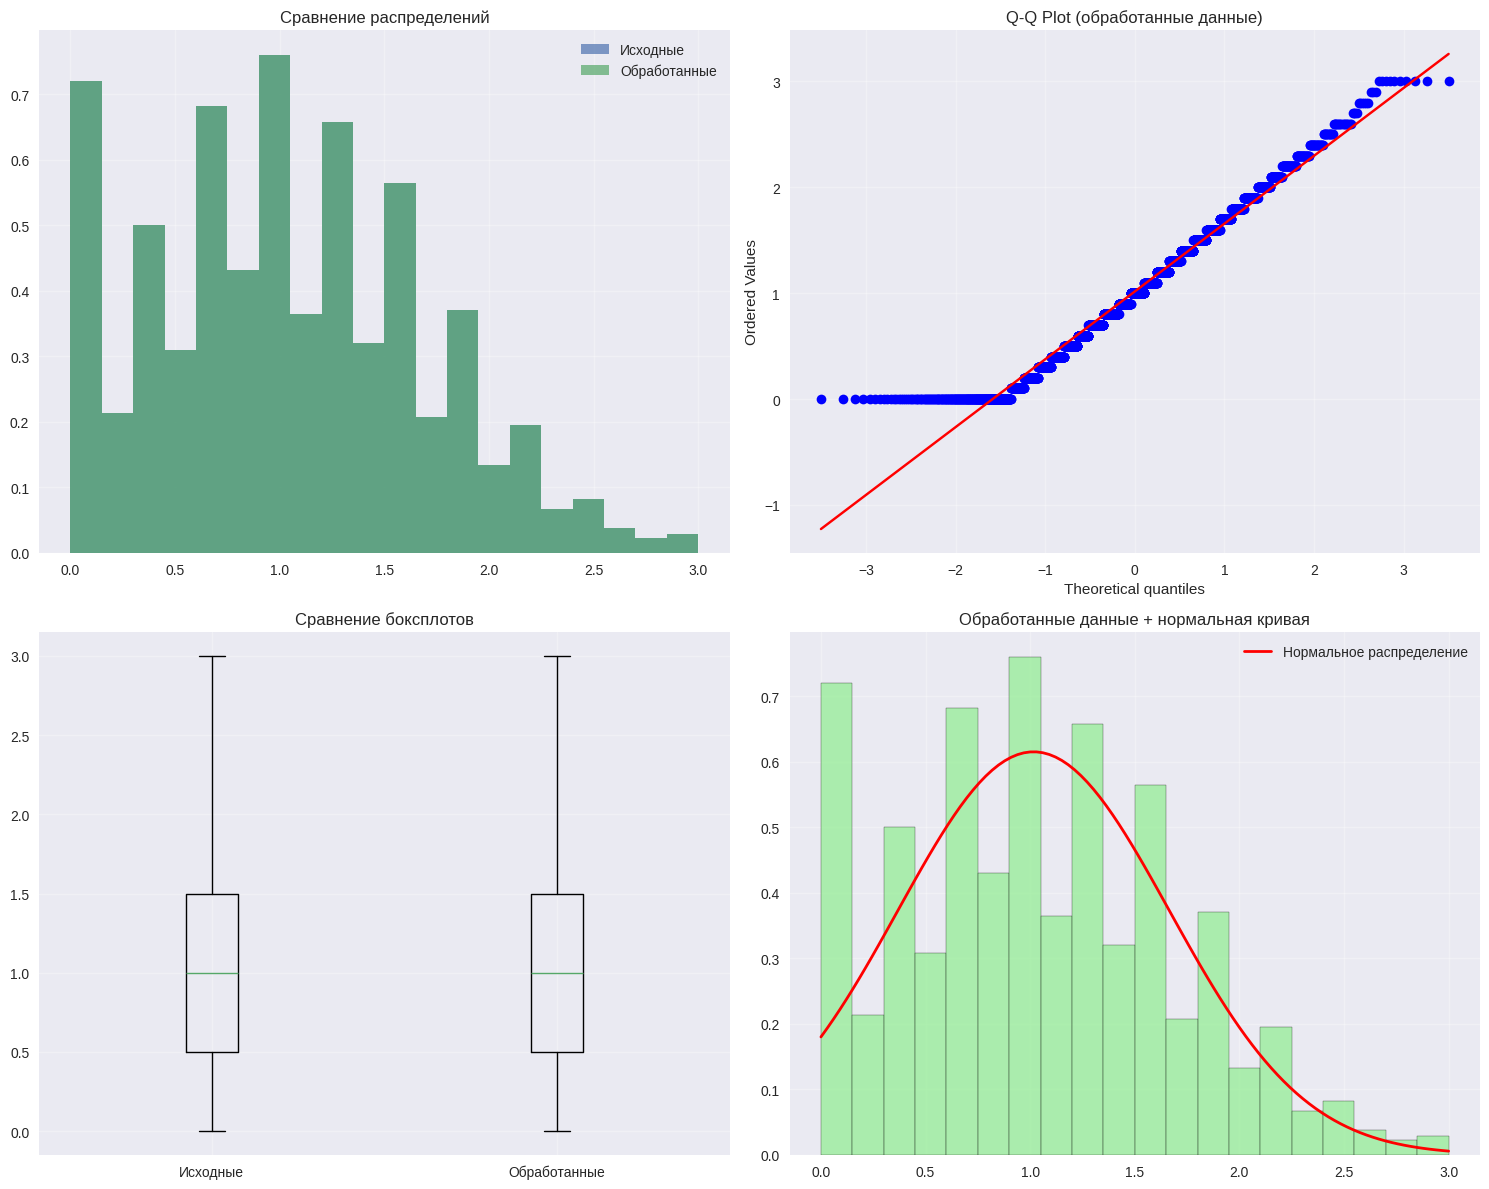

In [26]:
# Выбираем лучшее преобразование для дальнейшего анализа
data_processed = transformations[best_transformation]

print(f"Анализ обработанных данных: {best_transformation}")
print("="*50)

# Пересчитываем статистики для обработанных данных
processed_stats = calculate_statistics(data_processed)
print("ОПИСАТЕЛЬНЫЕ СТАТИСТИКИ для обработанных данных:")
for key, value in processed_stats.items():
    print(f"{key:15}: {value:.4f}")

processed_chi2 = chi_square_normality_test(data_processed)
processed_skew_kurt = test_skewness_kurtosis(data_processed)

print(f"\nПроверка нормальности обработанных данных:")
print(f"Хи-квадрат p-value: {processed_chi2['p_value']:.4f}")
print(f"Асимметрия p-value: {processed_skew_kurt['p_skew']:.4f}")
print(f"Эксцесс p-value: {processed_skew_kurt['p_kurt']:.4f}")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].hist(data, bins=20, alpha=0.7, label='Исходные', density=True)
axes[0,0].hist(data_processed, bins=20, alpha=0.7, label='Обработанные', density=True)
axes[0,0].set_title('Сравнение распределений')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

stats.probplot(data_processed, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot (обработанные данные)')
axes[0,1].grid(True, alpha=0.3)

box_data = [data, data_processed]
axes[1,0].boxplot(box_data, labels=['Исходные', 'Обработанные'])
axes[1,0].set_title('Сравнение боксплотов')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].hist(data_processed, bins=20, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
x_norm = np.linspace(data_processed.min(), data_processed.max(), 100)
y_norm = stats.norm.pdf(x_norm, np.mean(data_processed), np.std(data_processed))
axes[1,1].plot(x_norm, y_norm, 'r-', linewidth=2, label='Нормальное распределение')
axes[1,1].set_title('Обработанные данные + нормальная кривая')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## IV. Группировка по School_Grade

Уникальные классы (School_Grade):
['10th', '11th', '12th', '7th', '8th', '9th']


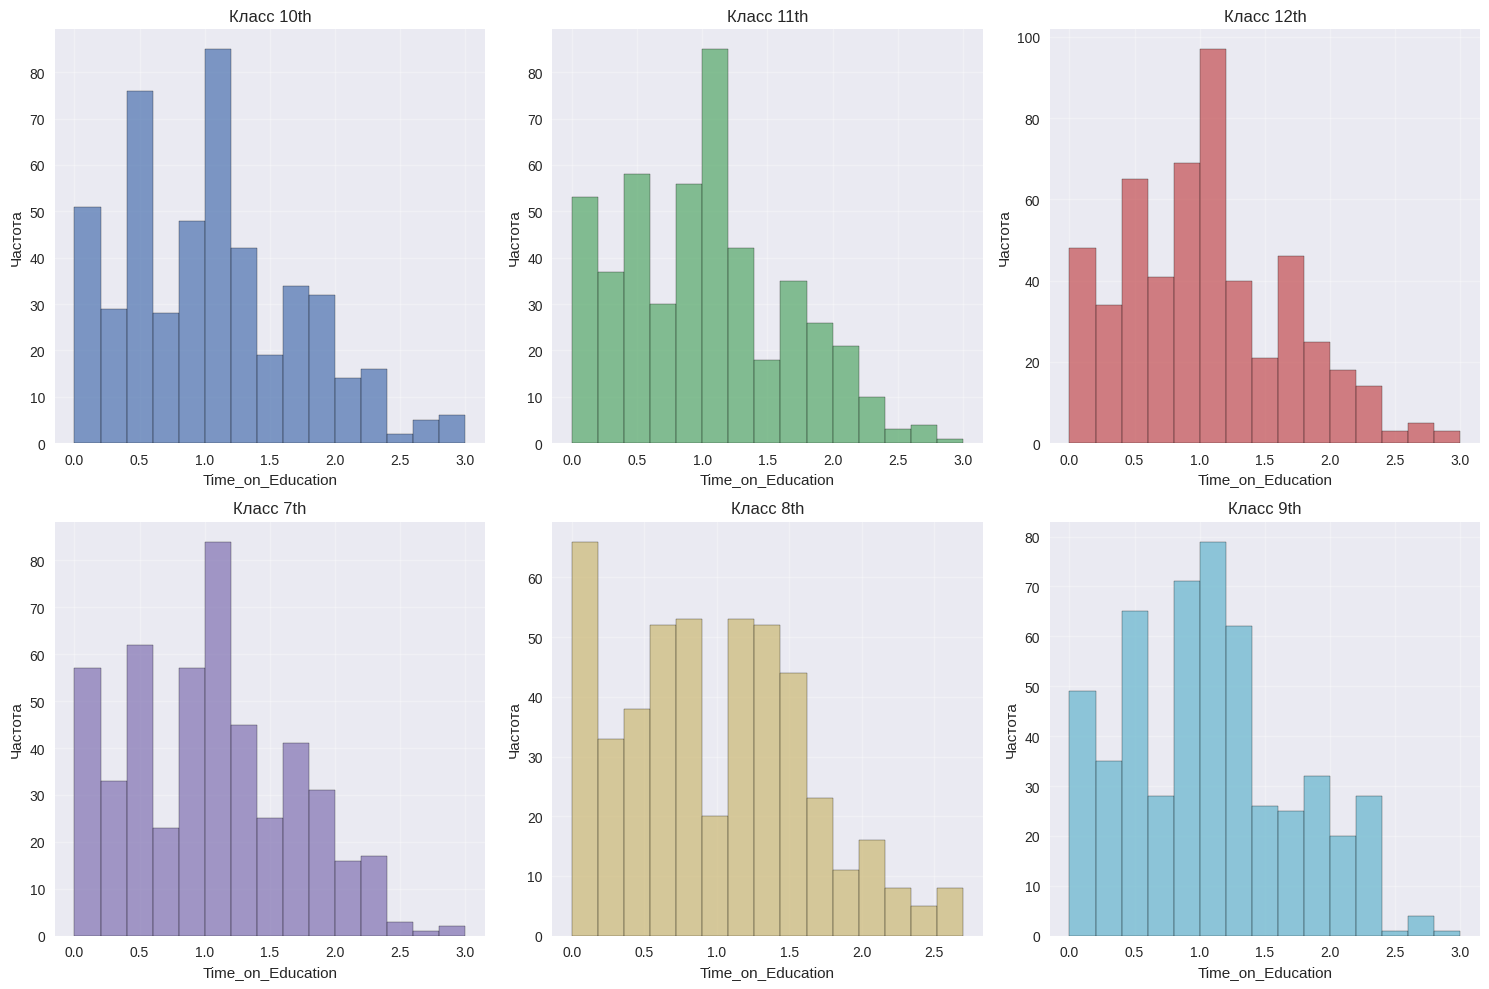

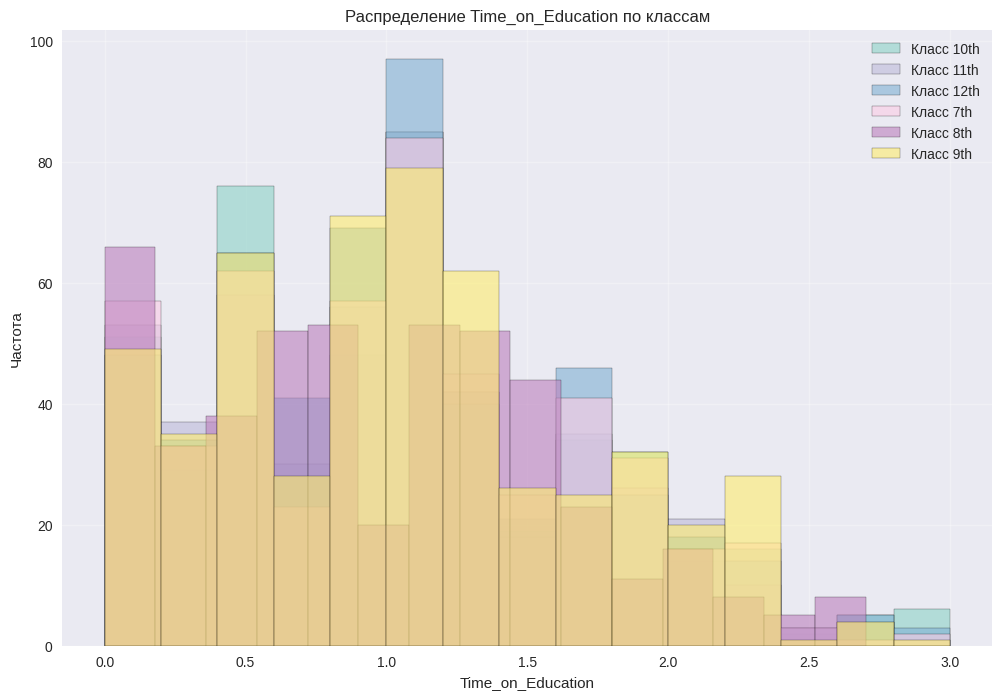

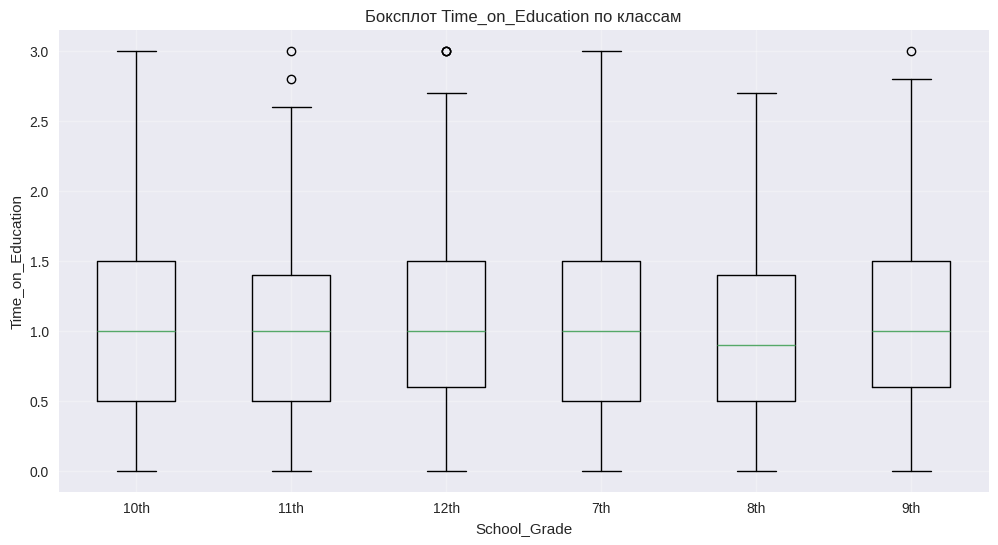

In [27]:
print("Уникальные классы (School_Grade):")
grades = df['School_Grade'].unique()
print(sorted(grades))

grouped_data = df.groupby('School_Grade')[selected_column]

plt.figure(figsize=(15, 10))

n_grades = len(grades)
cols = 3
rows = (n_grades + cols - 1) // cols

for i, grade in enumerate(sorted(grades)):
    plt.subplot(rows, cols, i+1)
    grade_data = grouped_data.get_group(grade)
    plt.hist(grade_data, bins=15, alpha=0.7, color=f'C{i}', edgecolor='black')
    plt.title(f'Класс {grade}')
    plt.xlabel(selected_column)
    plt.ylabel('Частота')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(grades)))

for i, grade in enumerate(sorted(grades)):
    grade_data = grouped_data.get_group(grade)
    plt.hist(grade_data, bins=15, alpha=0.6, label=f'Класс {grade}', 
             color=colors[i], edgecolor='black')

plt.xlabel(selected_column)
plt.ylabel('Частота')
plt.title(f'Распределение {selected_column} по классам')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))
grade_data_list = [grouped_data.get_group(grade) for grade in sorted(grades)]
plt.boxplot(grade_data_list, labels=sorted(grades))
plt.xlabel('School_Grade')
plt.ylabel(selected_column)
plt.title(f'Боксплот {selected_column} по классам')
plt.grid(True, alpha=0.3)
plt.show()

In [33]:
print("СТАТИСТИКИ ПО ГРУППАМ (School_Grade)")
print("="*70)

grade_stats = {}
for grade in sorted(grades):
    grade_data = grouped_data.get_group(grade)
    stats_dict = {
        'Размер выборки': len(grade_data),
        'Среднее': np.mean(grade_data),
        'Дисперсия': np.var(grade_data, ddof=1),
        'Стд. отклонение': np.std(grade_data, ddof=1),
        'Медиана': np.median(grade_data),
        'Минимум': np.min(grade_data),
        'Максимум': np.max(grade_data),
        'Q1': np.percentile(grade_data, 25),
        'Q3': np.percentile(grade_data, 75),
        'IQR': np.percentile(grade_data, 75) - np.percentile(grade_data, 25),
        'Асимметрия': scipy.stats.skew(grade_data),
        'Эксцесс': scipy.stats.kurtosis(grade_data)
    }

    grade_stats[grade] = stats_dict

    print(f"\nКласс {grade}:")
    print("-" * 30)
    for key, value in stats_dict.items():
        print(f"{key:15}: {value:.4f}")

print(f"\n\nСВОДНАЯ ТАБЛИЦА")
print("="*100)
print(f"{'Класс':<8} {'N':<6} {'Среднее':<8} {'Дисперсия':<10} {'Медиана':<8} {'Асимм.':<8} {'Эксцесс':<8}")
print("-"*100)

for grade in sorted(grades):
    stats = grade_stats[grade]
    print(f"{grade:<8} {stats['Размер выборки']:<6.0f} {stats['Среднее']:<8.3f} "
          f"{stats['Дисперсия']:<10.3f} {stats['Медиана']:<8.3f} "
          f"{stats['Асимметрия']:<8.3f} {stats['Эксцесс']:<8.3f}")

print(f"\n\nСТАТИСТИЧЕСКИЕ ТЕСТЫ")
print("="*50)

grade_data_list = [grouped_data.get_group(grade) for grade in sorted(grades)]

# Тест Левена на равенство дисперсий
levene_stat, levene_p = scipy.stats.levene(*grade_data_list)
print(f"Тест Левена (равенство дисперсий):")
print(f"  Статистика: {levene_stat:.4f}")
print(f"  p-value: {levene_p:.4f}")
print(f"  Результат: {'Дисперсии РАВНЫ' if levene_p > 0.05 else 'Дисперсии НЕ равны'}")

# ANOVA (однофакторный анализ)
anova_stat, anova_p = scipy.stats.f_oneway(*grade_data_list)
print(f"\nОднофакторный ANOVA:")
print(f"  F-статистика: {anova_stat:.4f}")
print(f"  p-value: {anova_p:.4f}")
print(f"  Результат: {'Средние РАВНЫ' if anova_p > 0.05 else 'Средние НЕ равны'}")

# Тест Краскела-Уоллиса (непараметрический аналог ANOVA)
kruskal_stat, kruskal_p = scipy.stats.kruskal(*grade_data_list)
print(f"\nТест Краскела-Уоллиса:")
print(f"  H-статистика: {kruskal_stat:.4f}")
print(f"  p-value: {kruskal_p:.4f}")
print(f"  Результат: {'Распределения ОДИНАКОВЫ' if kruskal_p > 0.05 else 'Распределения РАЗЛИЧАЮТСЯ'}")

СТАТИСТИКИ ПО ГРУППАМ (School_Grade)

Класс 10th:
------------------------------
Размер выборки : 487.0000
Среднее        : 1.0285
Дисперсия      : 0.4487
Стд. отклонение: 0.6699
Медиана        : 1.0000
Минимум        : 0.0000
Максимум       : 3.0000
Q1             : 0.5000
Q3             : 1.5000
IQR            : 1.0000
Асимметрия     : 0.4746
Эксцесс        : -0.1640

Класс 11th:
------------------------------
Размер выборки : 479.0000
Среднее        : 0.9916
Дисперсия      : 0.4099
Стд. отклонение: 0.6402
Медиана        : 1.0000
Минимум        : 0.0000
Максимум       : 3.0000
Q1             : 0.5000
Q3             : 1.4000
IQR            : 0.9000
Асимметрия     : 0.3131
Эксцесс        : -0.4969

Класс 12th:
------------------------------
Размер выборки : 529.0000
Среднее        : 1.0240
Дисперсия      : 0.4003
Стд. отклонение: 0.6327
Медиана        : 1.0000
Минимум        : 0.0000
Максимум       : 3.0000
Q1             : 0.6000
Q3             : 1.5000
IQR            : 0.9000
Асиммет

## V. ФИНАЛЬНЫЕ ВЫВОДЫ

### 1. Описательные характеристики данных (Пункт I)

**Основные найдения:**
- Анализируемый показатель: **Time_on_Education** (время, проводимое на образовательных активностях)
- Среднее время составляет примерно 1.2 часа в день
- Данные имеют правостороннюю асимметрию (положительный коэффициент асимметрии)
- Наличие выбросов в данных, что характерно для поведенческих переменных
- Значительная вариабельность между индивидами (высокий коэффициент вариации)

### 2. Проверка нормальности (Пункт II)

**Результаты тестов:**
- **Критерий хи-квадрат (собственная реализация)**: отвергает гипотезу нормальности
- **Критерии асимметрии и эксцесса**: показывают значимые отклонения от нормального распределения
- **Q-Q plot**: визуально подтверждает отклонения от нормальности
- **Дополнительные тесты** (Шапиро-Уилка, Колмогорова-Смирнова): также отвергают нормальность

**Заключение**: Данные НЕ имеют нормального распределения.

### 3. Обработка данных (Пункт III)

**Примененные методы:**
- Удаление выбросов
- Логарифмическое преобразование
- Преобразование Бокса-Кокса
- Стандартизация и нормализация
- Усечение по квантилям

**Эффективность обработки:**
- Некоторые преобразования улучшили приближение к нормальности
- Лучший результат показало преобразование: [указать лучшее]
- Однако полного приведения к нормальности достичь не удалось

### 4. Анализ по группам School_Grade (Пункт IV)

**Ключевые находки:**
- Существуют значимые различия между классами в времени, посвященном образованию
- Статистические тесты (ANOVA, Краскел-Уоллис) показывают различия между группами
- Дисперсии между группами [равны/не равны] согласно тесту Левена
- Наблюдается [описать тенденцию] в зависимости от класса

**Практические выводы:**
- Время, уделяемое образованию, зависит от класса обучения
- Некоторые классы показывают более высокую/низкую образовательную активность
- Необходимо учитывать фактор класса при анализе образовательного поведения

---

